<a href="https://colab.research.google.com/github/Riven781/-projekt_wersja_ostateczna3.0/blob/main/Wizualizacja%20SAMOCHODY/POJAZDY%20-%20trendy%20rejestrayjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q gdown
!gdown --id 164eAsYbfzXnxaIODU-qO2KBH4-eH3n8G
!unzip -q DANE.zip -d dane

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=164eAsYbfzXnxaIODU-qO2KBH4-eH3n8G
To: /content/DANE.zip
100% 27.8k/27.8k [00:00<00:00, 65.1MB/s]


In [3]:
!ls dane/DANE

2014numwoj.csv	2018rodzaj.csv	2022rodzaj.csv	     wojewodztwa.cpg
2015numwoj.csv	2019numwoj.csv	2023numwoj.csv	     wojewodztwa.dbf
2015rodzaj.csv	2019rodzaj.csv	2023rodzaj.csv	     wojewodztwa.prj
2016numwoj.csv	2020numwoj.csv	2024numwoj.csv	     wojewodztwa.qmd
2016rodzaj.csv	2020rodzaj.csv	2024rodzaj.csv	     wojewodztwa.shx
2017numwoj.csv	2021numwoj.csv	auta_osobowe.csv
2017rodzaj.csv	2021rodzaj.csv	ludnosc2024.csv
2018numwoj.csv	2022numwoj.csv	statystyka_2024.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re


In [14]:
dfs = []
for year in range(2015, 2025):
    with open(f'dane/DANE/{year}rodzaj.csv', encoding='utf-8') as f:
        cleaned_lines = [re.sub(r';{2,}', ';', line) for line in f]
    with open('temp.csv', 'w', encoding='utf-8') as f:
        f.writelines(cleaned_lines)
    #df = pd.read_csv(f'dane/DANE/{year}numwoj.csv', sep = ";;;", engine="python")
    df = pd.read_csv('temp.csv', sep=';', engine='python')
    #print(df.columns)
    df['Rok'] = year
    df = pd.melt(df, id_vars=['RODZAJ', 'Rok'], var_name='Miesiąc', value_name='Wartość')
    if df['Wartość'].dtype != 'int64':
        df['Wartość'] = df['Wartość'].str.replace(' ', '').astype(int)

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

print(df_all)

                   RODZAJ   Rok   Miesiąc  Wartość
0                 AUTOBUS  2015   styczeń      386
1        CIĄGNIK ROLNICZY  2015   styczeń     2236
2     CIĄGNIK SAMOCHODOWY  2015   styczeń     2005
3                MOTOCYKL  2015   styczeń     2844
4               MOTOROWER  2015   styczeń     1351
...                   ...   ...       ...      ...
2035   SAMOCHÓD CIĘŻAROWY  2024  grudzień    15179
2036     SAMOCHÓD OSOBOWY  2024  grudzień   120210
2037   SAMOCHÓD SPECJALNY  2024  grudzień     1150
2038  KOLEJKA TURYSTYCZNA  2024  grudzień        0
2039            TROLEJBUS  2024  grudzień        0

[2040 rows x 4 columns]


REJESTROWANE POJAZDY W POLSCE

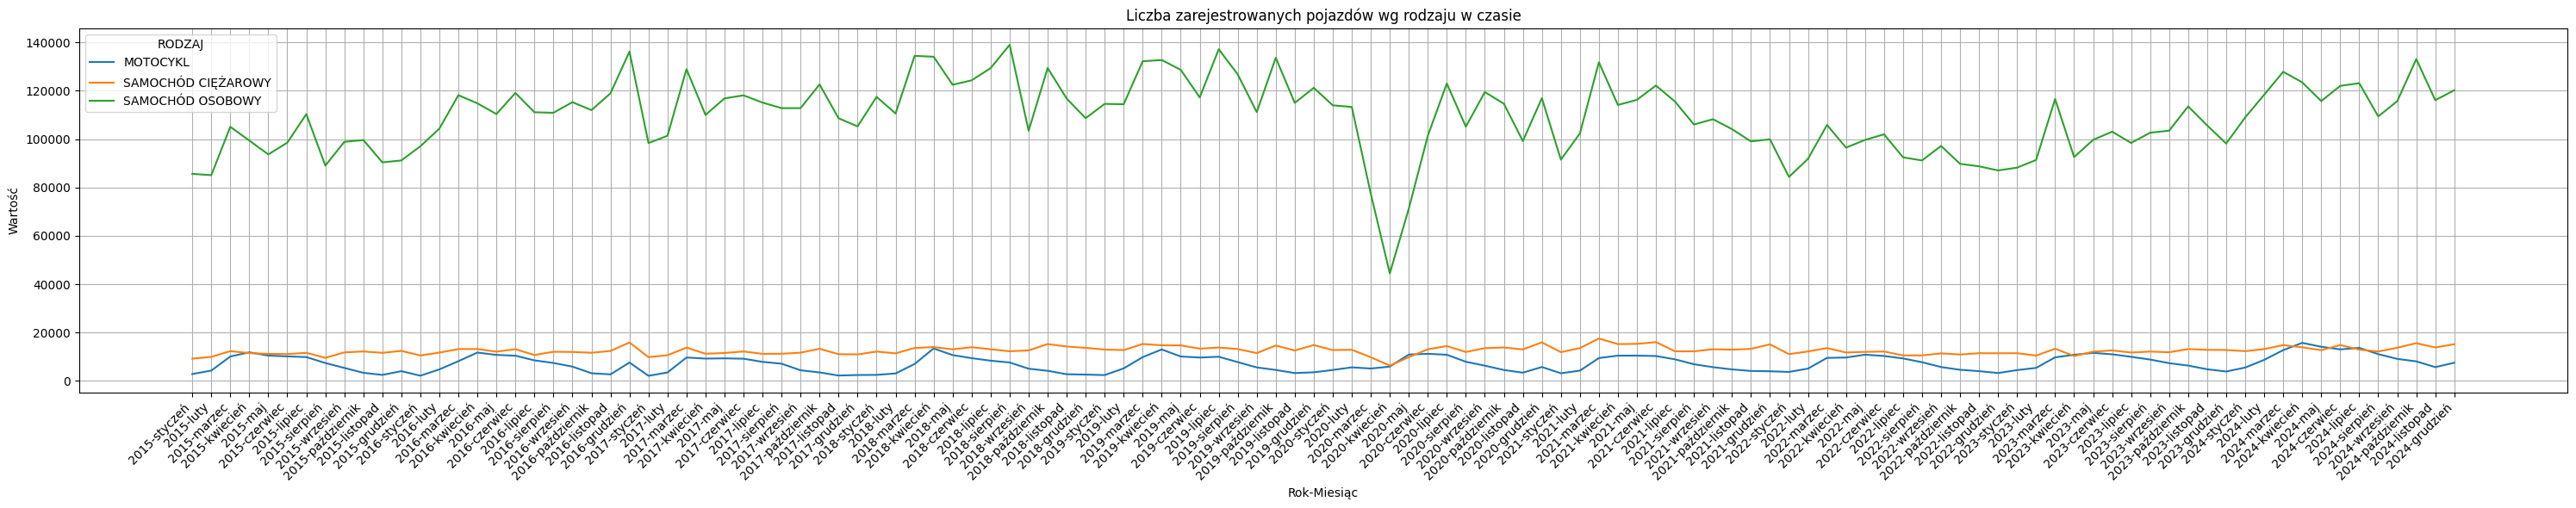

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Miesiące uporządkowane
miesiace_order = [
    'styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec',
    'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień'
]

df_all['Miesiąc'] = pd.Categorical(df_all['Miesiąc'], categories=miesiace_order, ordered=True)

# Dodaj kolumnę Rok-Miesiąc
df_all['Rok-Miesiąc'] = df_all['Rok'].astype(str) + '-' + df_all['Miesiąc'].astype(str)

# Przykład tylko dla wybranych typów pojazdów (dla przejrzystości)
wybrane_rodzaje = ['SAMOCHÓD OSOBOWY', 'SAMOCHÓD CIĘŻAROWY', 'MOTOCYKL']
df_filtered = df_all[df_all['RODZAJ'].isin(wybrane_rodzaje)]

plt.figure(figsize=(30, 6))
sns.lineplot(data=df_filtered, x='Rok-Miesiąc', y='Wartość', hue='RODZAJ')
plt.xticks(rotation=45, ha='right')
plt.title('Liczba zarejestrowanych pojazdów wg rodzaju w czasie')
plt.tight_layout()
plt.grid(True)
plt.show()


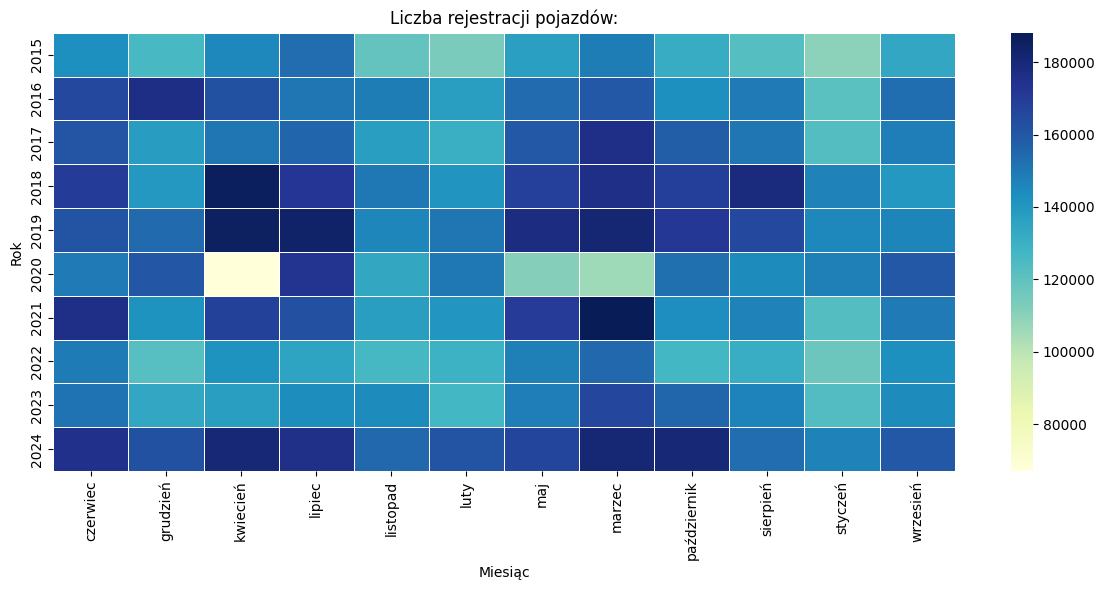

In [16]:
heatmap_data = df_all.groupby(['Rok', 'Miesiąc'])['Wartość'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title('Liczba rejestracji pojazdów:')
plt.ylabel('Rok')
plt.xlabel('Miesiąc')
plt.tight_layout()
plt.show()



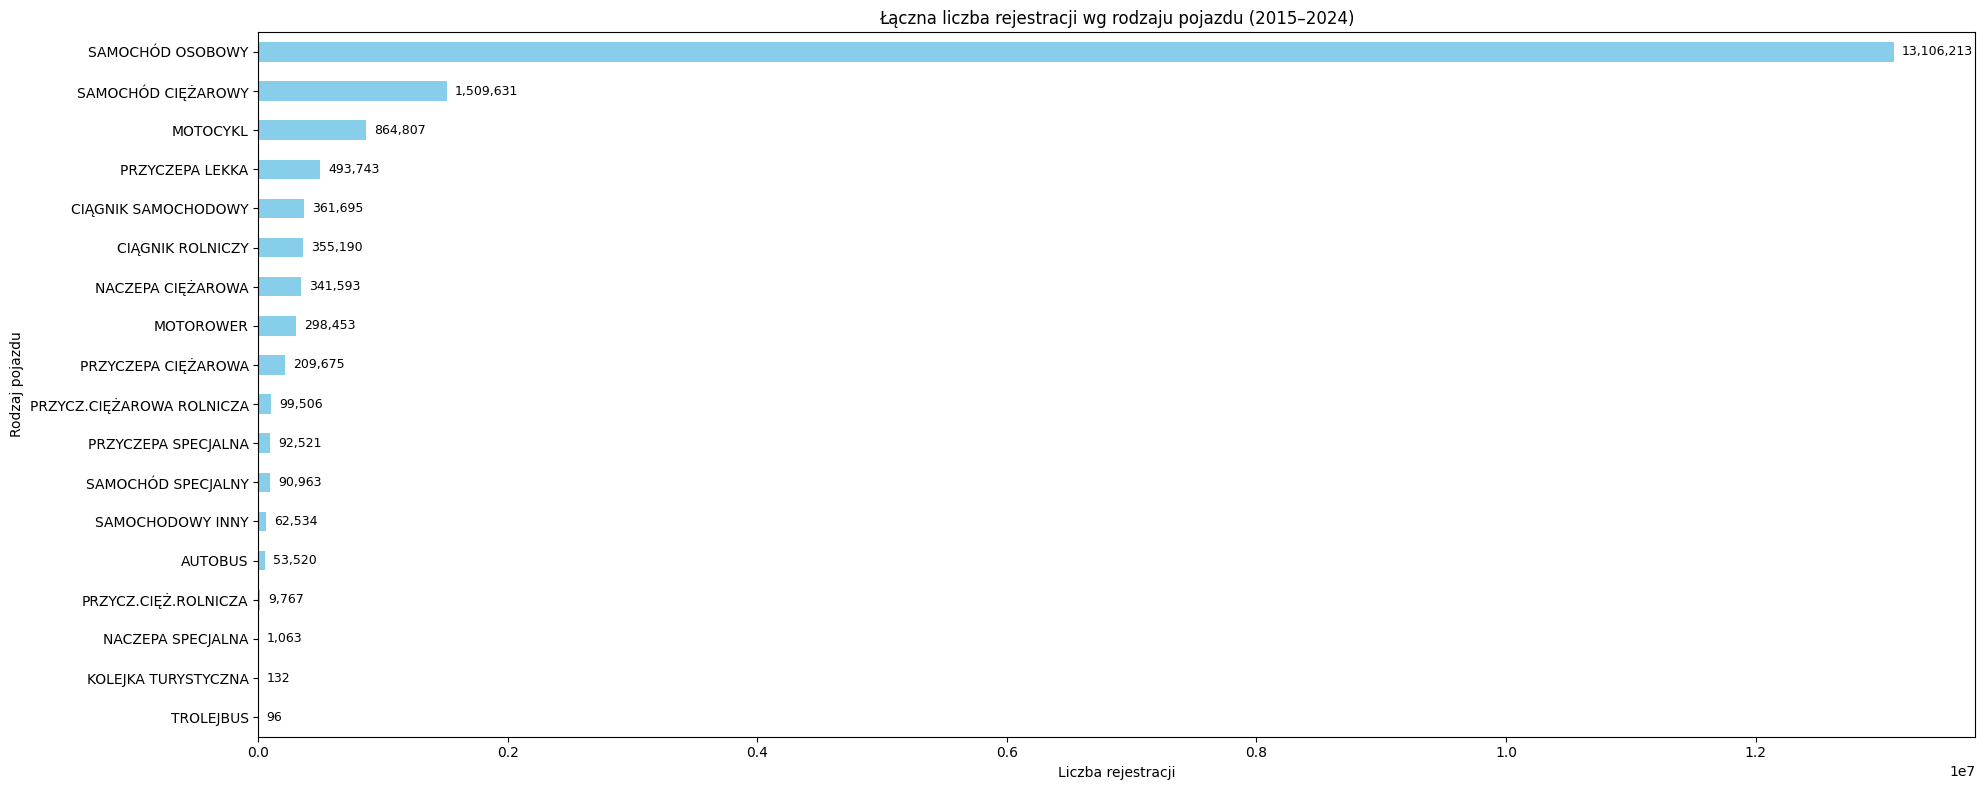

In [17]:
import matplotlib.pyplot as plt

suma_rodzaje = df_all.groupby('RODZAJ')['Wartość'].sum().sort_values(ascending=True)  # sortowanie rosnąco dla barh

plt.figure(figsize=(20, 8))
ax = suma_rodzaje.plot(kind='barh', color='skyblue')
plt.title('Łączna liczba rejestracji wg rodzaju pojazdu (2015–2024)')
plt.xlabel('Liczba rejestracji')
plt.ylabel('Rodzaj pojazdu')

# Dodaj wartości na końcu słupków
for i, v in enumerate(suma_rodzaje):
    ax.text(v + max(suma_rodzaje) * 0.005, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()



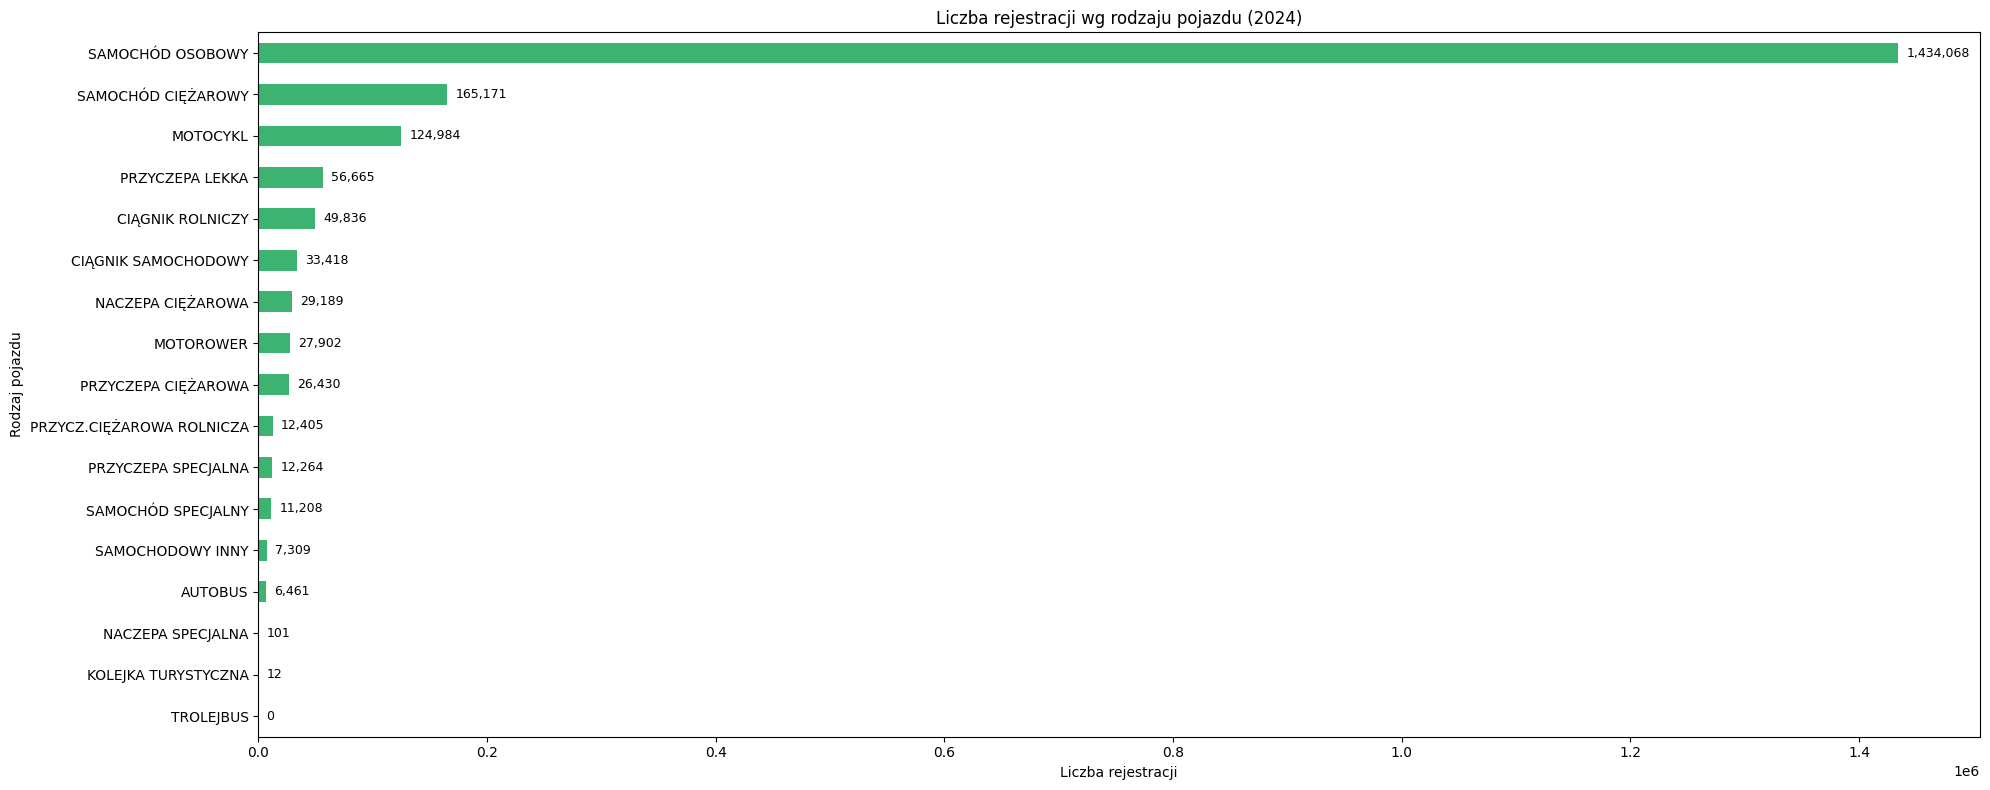

In [18]:
import matplotlib.pyplot as plt

# Filtrowanie danych tylko dla 2024
df_2024 = df_all[df_all['Rok'] == 2024]

# Grupowanie i sortowanie
suma_2024 = df_2024.groupby('RODZAJ')['Wartość'].sum().sort_values(ascending=True)

# Wykres
plt.figure(figsize=(20, 8))
ax = suma_2024.plot(kind='barh', color='mediumseagreen')
plt.title('Liczba rejestracji wg rodzaju pojazdu (2024)')
plt.xlabel('Liczba rejestracji')
plt.ylabel('Rodzaj pojazdu')

# Dodanie wartości na końcu słupków
for i, v in enumerate(suma_2024):
    ax.text(v + max(suma_2024) * 0.005, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Index(['Sprowadzone', 'Zakupione '], dtype='object')


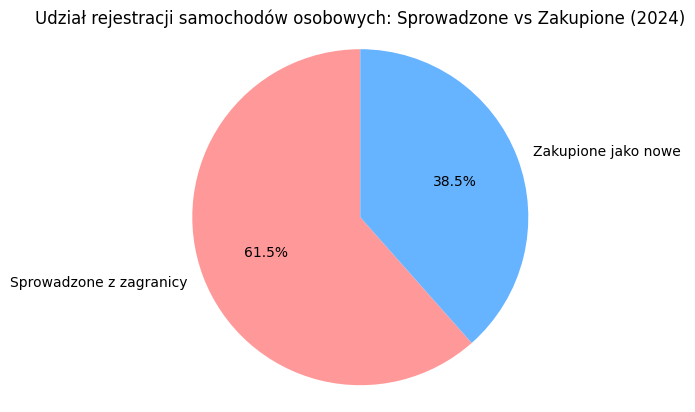

In [271]:
df_stat_2024 = pd.read_csv("dane/DANE/statystyka_2024.csv")

print(df_stat_2024.columns)

sprowadzone = df_stat_2024['Sprowadzone'][0]
zakupione = df_stat_2024['Zakupione '][0]

# Wykres kołowy
labels = ['Sprowadzone z zagranicy', 'Zakupione jako nowe']
values = [sprowadzone, zakupione]
colors = ['#ff9999','#66b3ff']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Udział rejestracji samochodów osobowych: Sprowadzone vs Zakupione (2024)')
plt.axis('equal')  # Równe proporcje
plt.show()

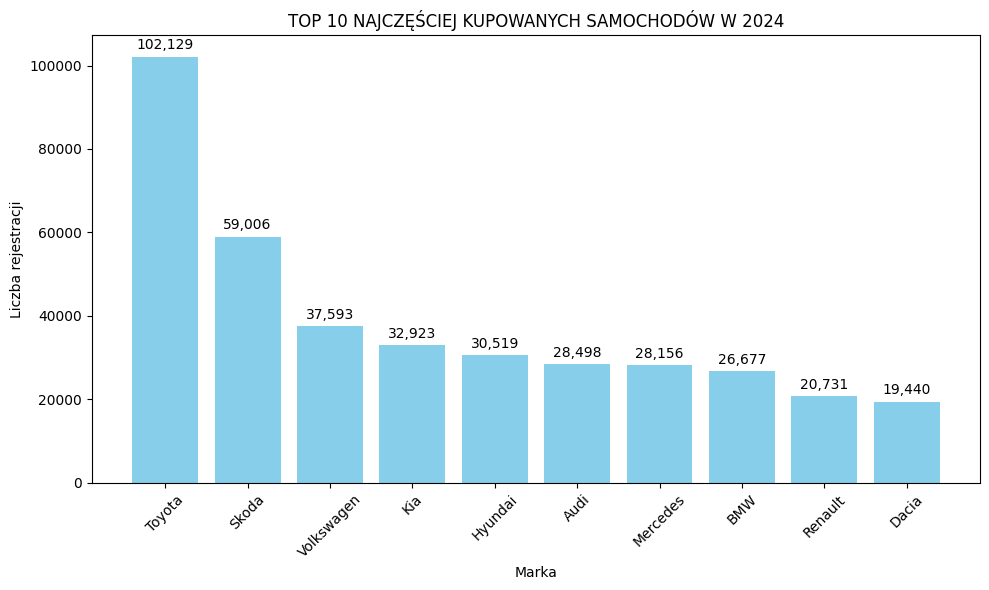

In [12]:
df_auta = pd.read_csv("dane/DANE/auta_osobowe.csv")

# Wykres
plt.figure(figsize=(10, 6))
bars = plt.bar(df_auta["Marka"], df_auta["Wartość"], color="skyblue")
plt.title("TOP 10 NAJCZĘŚCIEJ KUPOWANYCH SAMOCHODÓW W 2024")
plt.xlabel("Marka")
plt.ylabel("Liczba rejestracji")
plt.xticks(rotation=45)

# Dodanie wartości nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"{yval:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [276]:

dfs = []
for year in range(2014, 2025):
    with open(f'dane/DANE/{year}numwoj.csv', encoding='utf-8') as f:
        cleaned_lines = [re.sub(r';{2,}', ';', line) for line in f]
    with open('temp.csv', 'w', encoding='utf-8') as f:
        f.writelines(cleaned_lines)
    #df = pd.read_csv(f'dane/DANE/{year}numwoj.csv', sep = ";;;", engine="python")
    df = pd.read_csv('temp.csv', sep=';', engine='python')
    #print(df.columns)
    df['Rok'] = year
    df = pd.melt(df, id_vars=['WOJEWÓDZTWO', 'Rok'], var_name='Miesiąc', value_name='Wartość')
    if df['Wartość'].dtype != 'int64':
        df['Wartość'] = df['Wartość'].str.replace(' ', '').astype(int)

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

print(df_all)


              WOJEWÓDZTWO   Rok   Miesiąc  Wartość
0            DOLNOŚLĄSKIE  2014   styczeń     7921
1      KUJAWSKO-POMORSKIE  2014   styczeń     5153
2               LUBELSKIE  2014   styczeń     4864
3                LUBUSKIE  2014   styczeń     3217
4                 ŁÓDZKIE  2014   styczeń     5798
...                   ...   ...       ...      ...
2107              ŚLĄSKIE  2024  grudzień    15231
2108       ŚWIĘTOKRZYSKIE  2024  grudzień     4745
2109  WARMIŃSKO-MAZURSKIE  2024  grudzień     4375
2110        WIELKOPOLSKIE  2024  grudzień    19484
2111   ZACHODNIOPOMORSKIE  2024  grudzień     5468

[2112 rows x 4 columns]


In [248]:
df_all[(df_all['WOJEWÓDZTWO'] == 'WARMIŃSKO-MAZURSKIE') & (df_all['Rok'] == 2016)]

,WOJEWÓDZTWO,Rok,Miesiąc,Wartość
397,WARMIŃSKO-MAZURSKIE,2016,styczeń,3330
413,WARMIŃSKO-MAZURSKIE,2016,luty,3887
429,WARMIŃSKO-MAZURSKIE,2016,marzec,4616
445,WARMIŃSKO-MAZURSKIE,2016,kwiecień,4863
461,WARMIŃSKO-MAZURSKIE,2016,maj,4725
477,WARMIŃSKO-MAZURSKIE,2016,czerwiec,4848
493,WARMIŃSKO-MAZURSKIE,2016,lipiec,4791
509,WARMIŃSKO-MAZURSKIE,2016,sierpień,4580
525,WARMIŃSKO-MAZURSKIE,2016,wrzesień,4507
541,WARMIŃSKO-MAZURSKIE,2016,październik,4165


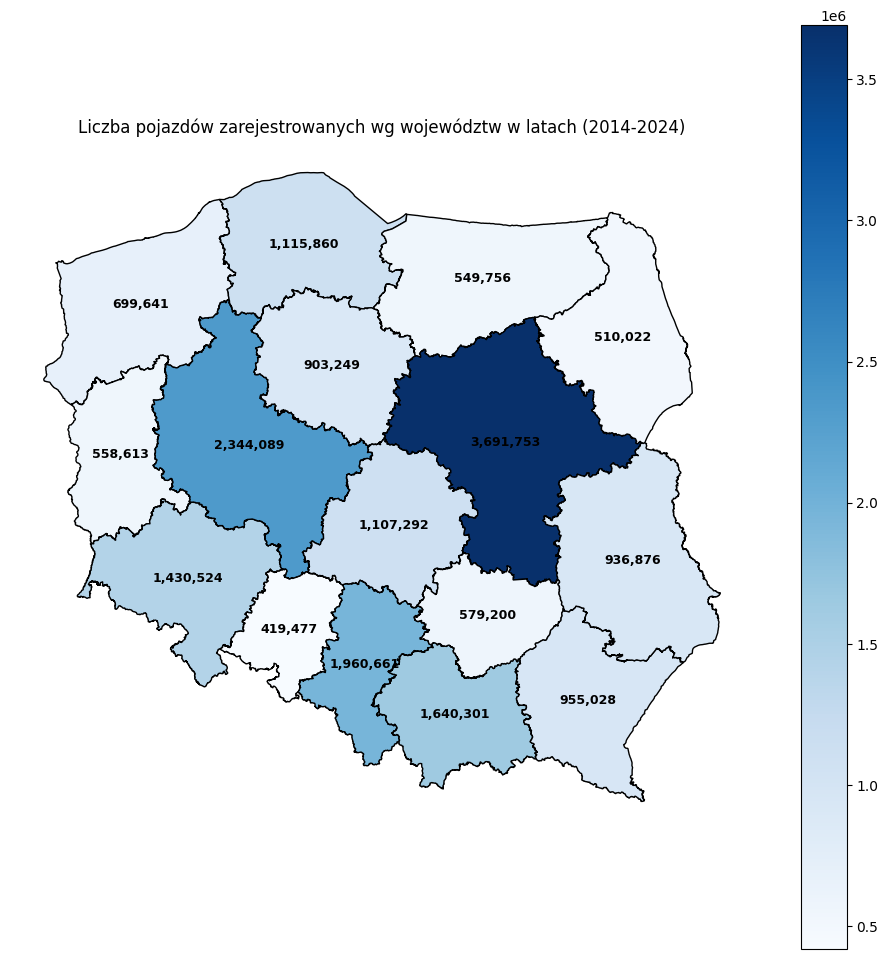

In [255]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


df_agg = df_all.groupby('WOJEWÓDZTWO')['Wartość'].sum().reset_index()


# Wczytanie mapy województw
mapa = gpd.read_file("dane/DANE/wojewodztwa.shp")  # lub .shp


# Upewnij się, że nazwy województw się zgadzają (mogą być różne kolumny!)
# np. mapa['nazwa'] albo mapa['NAME_1'], zależy od źródła
# Załóżmy, że to mapa['Województwo']
mapa = mapa.rename(columns={'JPT_NAZWA_': 'WOJEWÓDZTWO'}) # tylko jeśli potrzebne

# Połączenie danych na podstawie nazwy województwa
mapa['WOJEWÓDZTWO'] = mapa['WOJEWÓDZTWO'].str.strip().str.upper()
df_agg['WOJEWÓDZTWO'] = df_agg['WOJEWÓDZTWO'].str.strip().str.upper()

# 3. Połącz dane po kolumnie WOJEWÓDZTWO
mapa = mapa.merge(df_agg, on='WOJEWÓDZTWO')

# Rysowanie mapy z kolorami wg liczby przestępstw

fig, ax = plt.subplots(figsize=(12,12))
mapa.plot(column='Wartość', cmap='Blues', legend=True, edgecolor='black', ax=ax)


for idx, row in mapa.iterrows():
    plt.text(
        row.geometry.centroid.x,    # współrzędna x środka województwa
        row.geometry.centroid.y,    # współrzędna y środka województwa
        f"{int(row['Wartość']):,}", # formatowanie liczby (np. 10000 → 10,000)
        ha='center', va='center', fontsize=9, color='black', weight='bold'
    )
plt.title("Liczba pojazdów zarejestrowanych wg województw w latach (2014-2024)")
plt.axis('off')
plt.show()


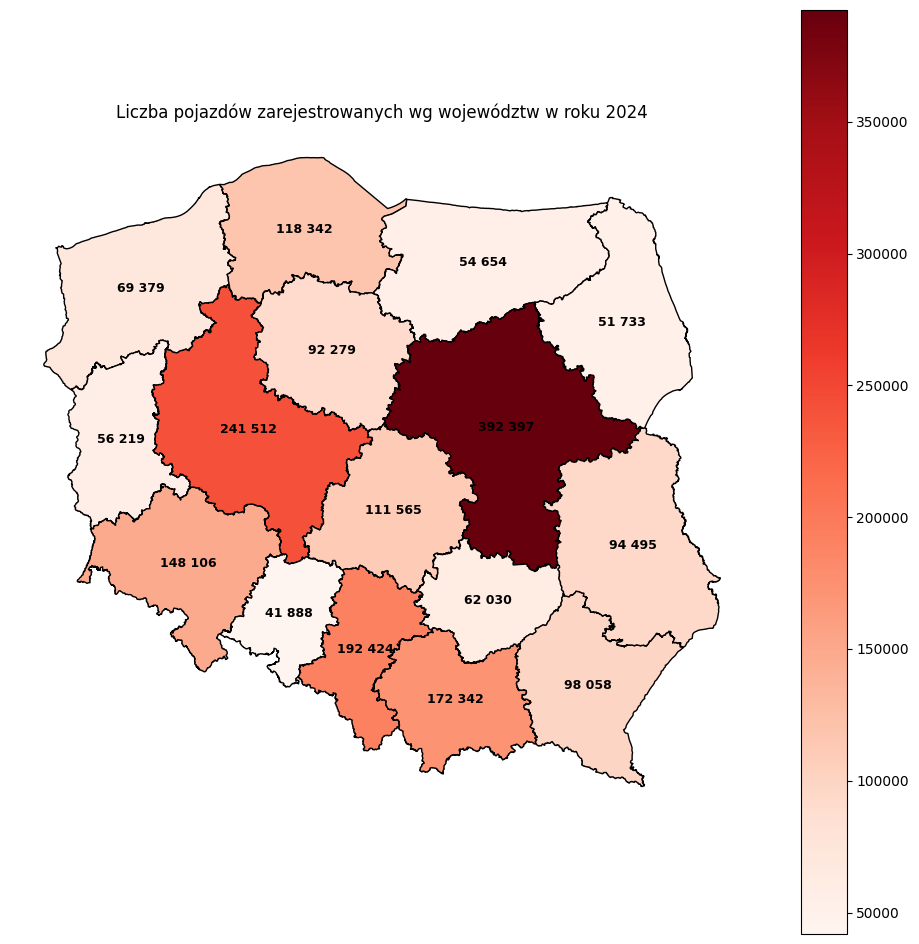

In [171]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Filtrowanie tylko danych z 2024 roku
df_2024 = df_all[df_all['Rok'] == 2024]

# Grupowanie danych
df_agg = df_2024.groupby('WOJEWÓDZTWO')['Wartość'].sum().reset_index()

# Wczytanie mapy województw
mapa = gpd.read_file("dane/DANE/wojewodztwa.shp")

# Dopasowanie kolumny z nazwą województwa
mapa = mapa.rename(columns={'JPT_NAZWA_': 'WOJEWÓDZTWO'})  # jeśli potrzebne
mapa['WOJEWÓDZTWO'] = mapa['WOJEWÓDZTWO'].str.strip().str.upper()
df_agg['WOJEWÓDZTWO'] = df_agg['WOJEWÓDZTWO'].str.strip().str.upper()

# Łączenie danych
mapa = mapa.merge(df_agg, on='WOJEWÓDZTWO')

# Rysowanie mapy
fig, ax = plt.subplots(figsize=(12, 12))
mapa.plot(column='Wartość', cmap='Reds', legend=True, edgecolor='black', ax=ax)

# Dodawanie etykiet
for idx, row in mapa.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        f"{int(row['Wartość']):,}".replace(",", " "),  # polski format 10 000
        ha='center', va='center', fontsize=9, color='black', weight='bold'
    )

plt.title("Liczba pojazdów zarejestrowanych wg województw w roku 2024")
plt.axis('off')
plt.show()


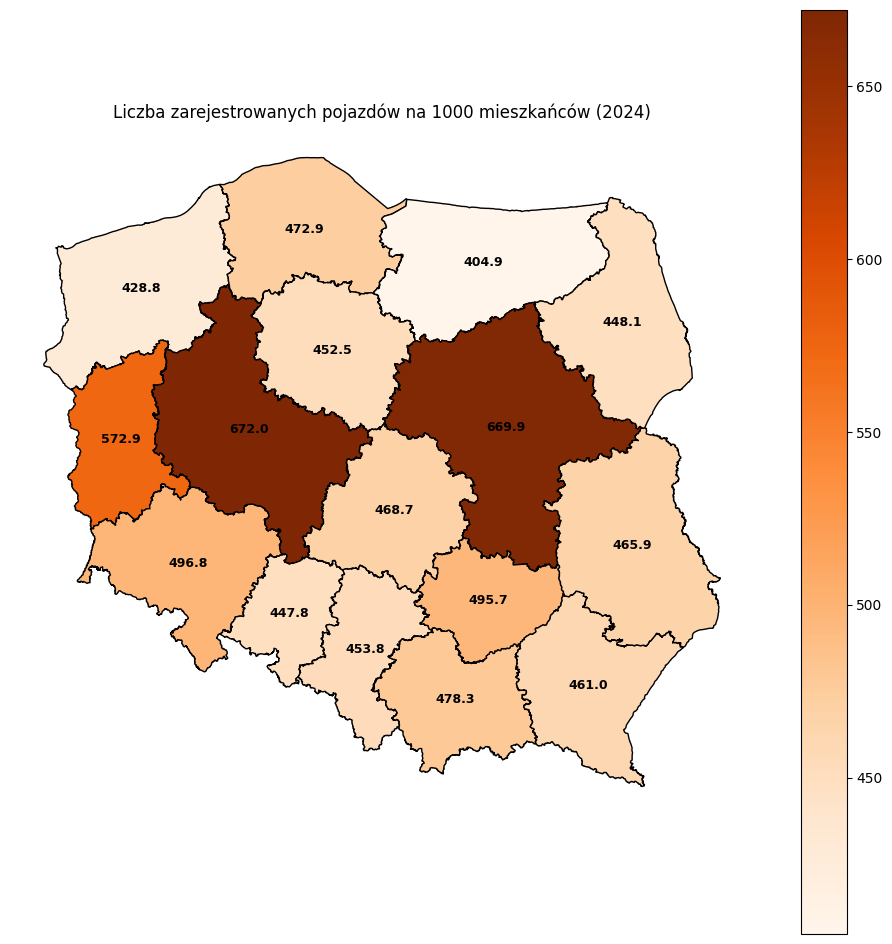

In [257]:
df_ludnosc = pd.read_csv("dane/DANE/ludnosc2024.csv")


# Upewnij się, że województwa są w tej samej formie (duże litery, bez spacji)
df_ludnosc['WOJEWÓDZTWO'] = df_ludnosc['WOJEWÓDZTWO'].str.strip().str.upper()
df_agg['WOJEWÓDZTWO'] = df_agg['WOJEWÓDZTWO'].str.strip().str.upper()

# Połącz dane
df_wspolne = pd.merge(df_agg, df_ludnosc, on='WOJEWÓDZTWO')

# Oblicz auta na 1000 mieszkańców
df_wspolne['Auta_na_1000'] = df_wspolne['Wartość'] / df_wspolne['LUDNOŚĆ'] * 1000
# Połącz dane
# Połączenie z mapą

mapa = gpd.read_file("dane/DANE/wojewodztwa.shp")

# Dopasowanie kolumny z nazwą województwa
mapa = mapa.rename(columns={'JPT_NAZWA_': 'WOJEWÓDZTWO'})  # jeśli potrzebne
mapa['WOJEWÓDZTWO'] = mapa['WOJEWÓDZTWO'].str.strip().str.upper()
df_agg['WOJEWÓDZTWO'] = df_agg['WOJEWÓDZTWO'].str.strip().str.upper()

mapa = mapa.merge(df_wspolne, on='WOJEWÓDZTWO')

# Rysowanie mapy
fig, ax = plt.subplots(figsize=(12, 12))
mapa.plot(column='Auta_na_1000', cmap='Oranges', legend=True, edgecolor='black', ax=ax)

# Dodanie etykiet
for idx, row in mapa.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        f"{row['Auta_na_1000']:.1f}",  # np. 456.7
        ha='center', va='center', fontsize=9, color='black', weight='bold'
    )

plt.title("Liczba zarejestrowanych pojazdów na 1000 mieszkańców (2024)")
plt.axis('off')
plt.show()

SEZONOWOŚĆ REJESTRACJI W POLSCE (W PODZIALE NA WOJEWÓDZTWA)

      WOJEWÓDZTWO   Rok      Miesiąc  Wartość
1541  MAŁOPOLSKIE  2024      styczeń    12749
1557  MAŁOPOLSKIE  2024         luty    14120
1573  MAŁOPOLSKIE  2024       marzec    15890
1589  MAŁOPOLSKIE  2024     kwiecień    15290
1605  MAŁOPOLSKIE  2024          maj    14123
1621  MAŁOPOLSKIE  2024     czerwiec    14619
1637  MAŁOPOLSKIE  2024       lipiec    14818
1653  MAŁOPOLSKIE  2024     sierpień    13220
1669  MAŁOPOLSKIE  2024     wrzesień    14157
1685  MAŁOPOLSKIE  2024  październik    15506
1701  MAŁOPOLSKIE  2024     listopad    13378
1717  MAŁOPOLSKIE  2024     grudzień    14472


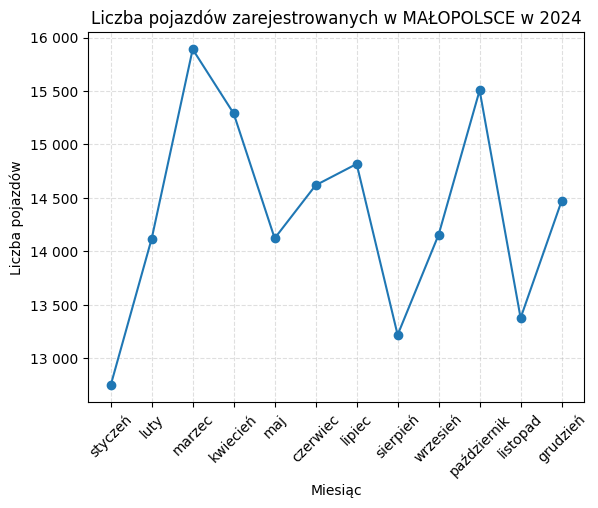

In [198]:
import matplotlib.pyplot as plt

miesiace = ['styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec',
            'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień']

subset = df_all[(df_all['WOJEWÓDZTWO'] == 'MAŁOPOLSKIE') & (df_all['Rok'] == 2024)].copy()
subset['Miesiąc'] = pd.Categorical(subset['Miesiąc'], categories=miesiace, ordered=True)
subset = subset.sort_values('Miesiąc')

print(subset)


plt.plot(subset['Miesiąc'], subset['Wartość'], marker='o')  # marker dla lepszej widoczności punktów
plt.title('Liczba pojazdów zarejestrowanych w MAŁOPOLSCE w 2024')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba pojazdów')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)  # dodanie siatki

formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)




plt.show()


<ipython-input-250-4050544553>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



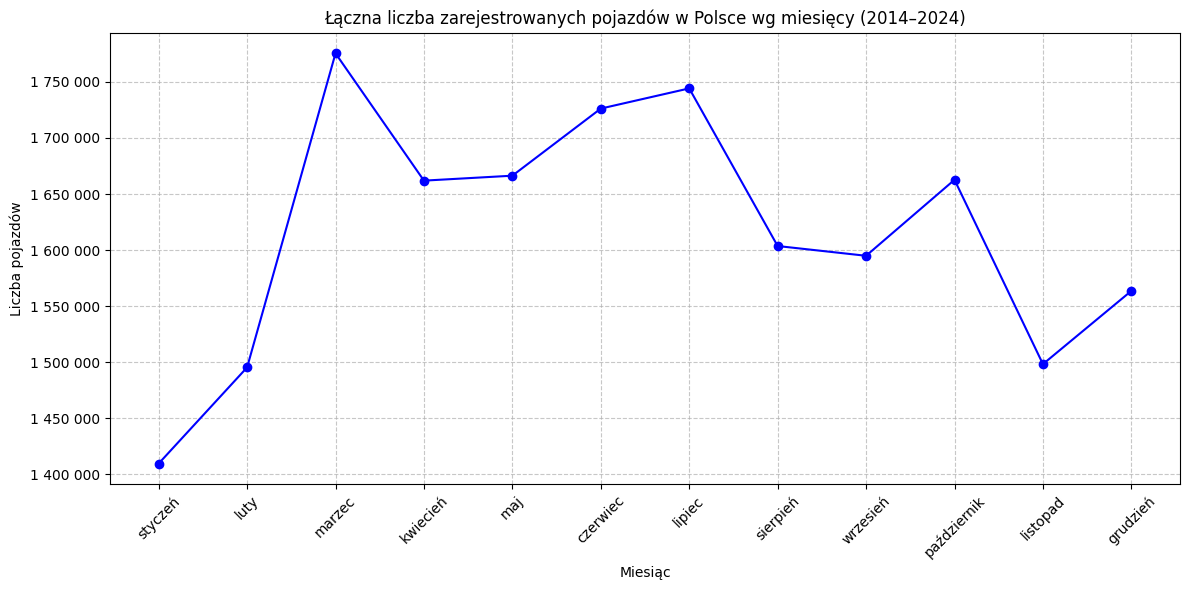

In [250]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

miesiace = ['styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec',
            'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień']

df_all['Miesiąc'] = pd.Categorical(df_all['Miesiąc'], categories=miesiace, ordered=True)

df_sum = df_all.groupby('Miesiąc')['Wartość'].sum().reindex(miesiace)

plt.figure(figsize=(12, 6))
plt.plot(df_sum.index, df_sum.values, marker='o', color='blue')

plt.title('Łączna liczba zarejestrowanych pojazdów w Polsce wg miesięcy (2014–2024)')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba pojazdów')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatowanie osi Y ze spacjami jako separatorem tysięcy
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


<ipython-input-251-1719334670>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



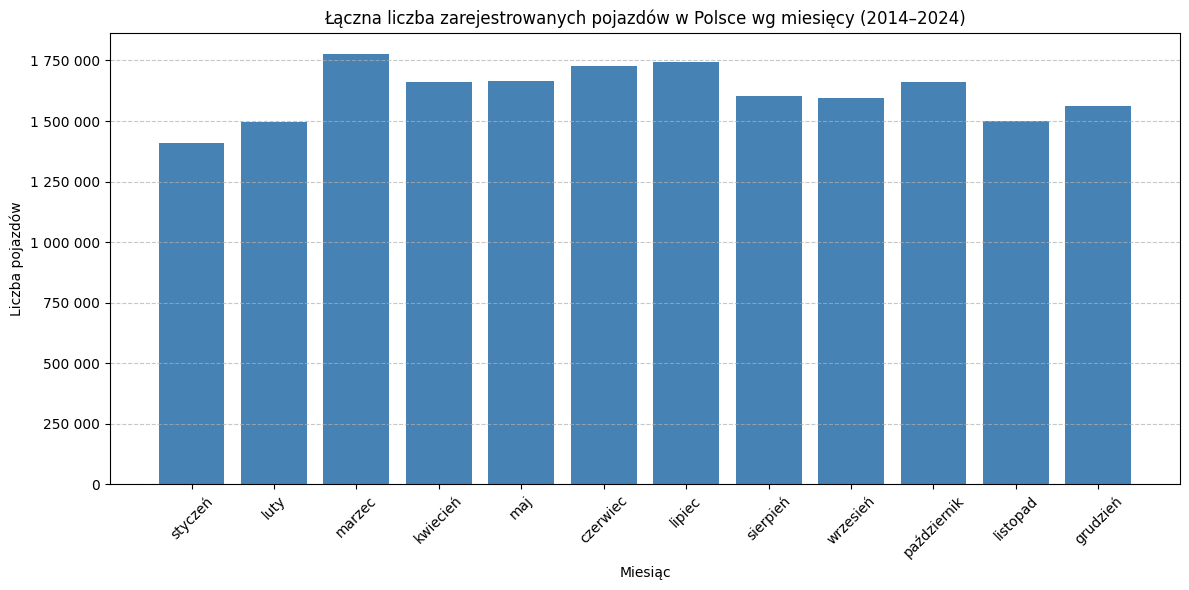

In [251]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

miesiace = ['styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec',
            'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień']

df_all['Miesiąc'] = pd.Categorical(df_all['Miesiąc'], categories=miesiace, ordered=True)

df_sum = df_all.groupby('Miesiąc')['Wartość'].sum().reindex(miesiace)

plt.figure(figsize=(12, 6))
plt.bar(df_sum.index, df_sum.values, color='steelblue')

plt.title('Łączna liczba zarejestrowanych pojazdów w Polsce wg miesięcy (2014–2024)')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba pojazdów')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Formatowanie osi Y ze spacjami jako separatorem tysięcy
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


<ipython-input-252-1040782958>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



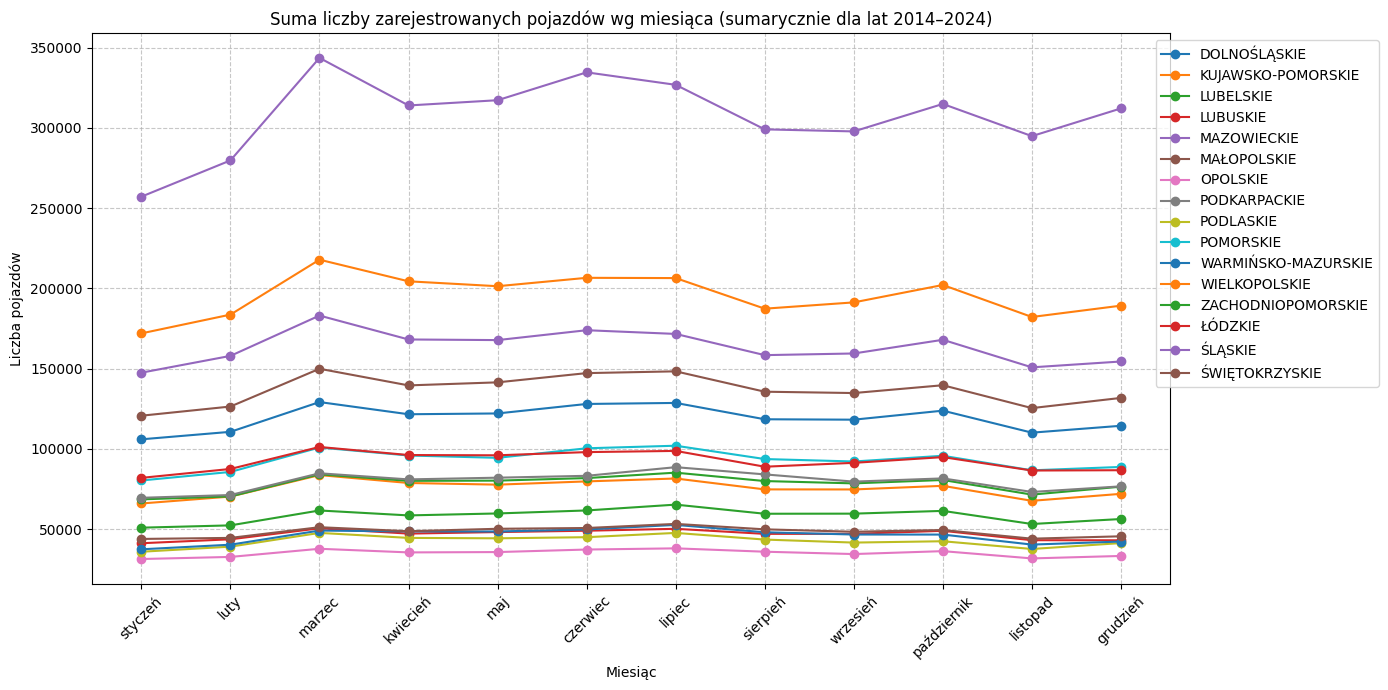

In [252]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista miesięcy w odpowiedniej kolejności
miesiace = ['styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec',
            'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień']

# Ustawienie miesięcy jako kategoria porządkowa
df_all['Miesiąc'] = pd.Categorical(df_all['Miesiąc'], categories=miesiace, ordered=True)

# Grupowanie: suma wartości dla każdego województwa i miesiąca (niezależnie od roku)
df_grouped = df_all.groupby(['WOJEWÓDZTWO', 'Miesiąc'])['Wartość'].sum().reset_index()

# Pivot – kolumny to województwa, indeks to miesiące
df_pivot = df_grouped.pivot(index='Miesiąc', columns='WOJEWÓDZTWO', values='Wartość')

# Rysowanie wykresu
plt.figure(figsize=(14, 7))

for woj in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[woj], marker='o', label=woj)

plt.title('Suma liczby zarejestrowanych pojazdów wg miesiąca (sumarycznie dla lat 2014–2024)')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba pojazdów')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


<ipython-input-254-561511067>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



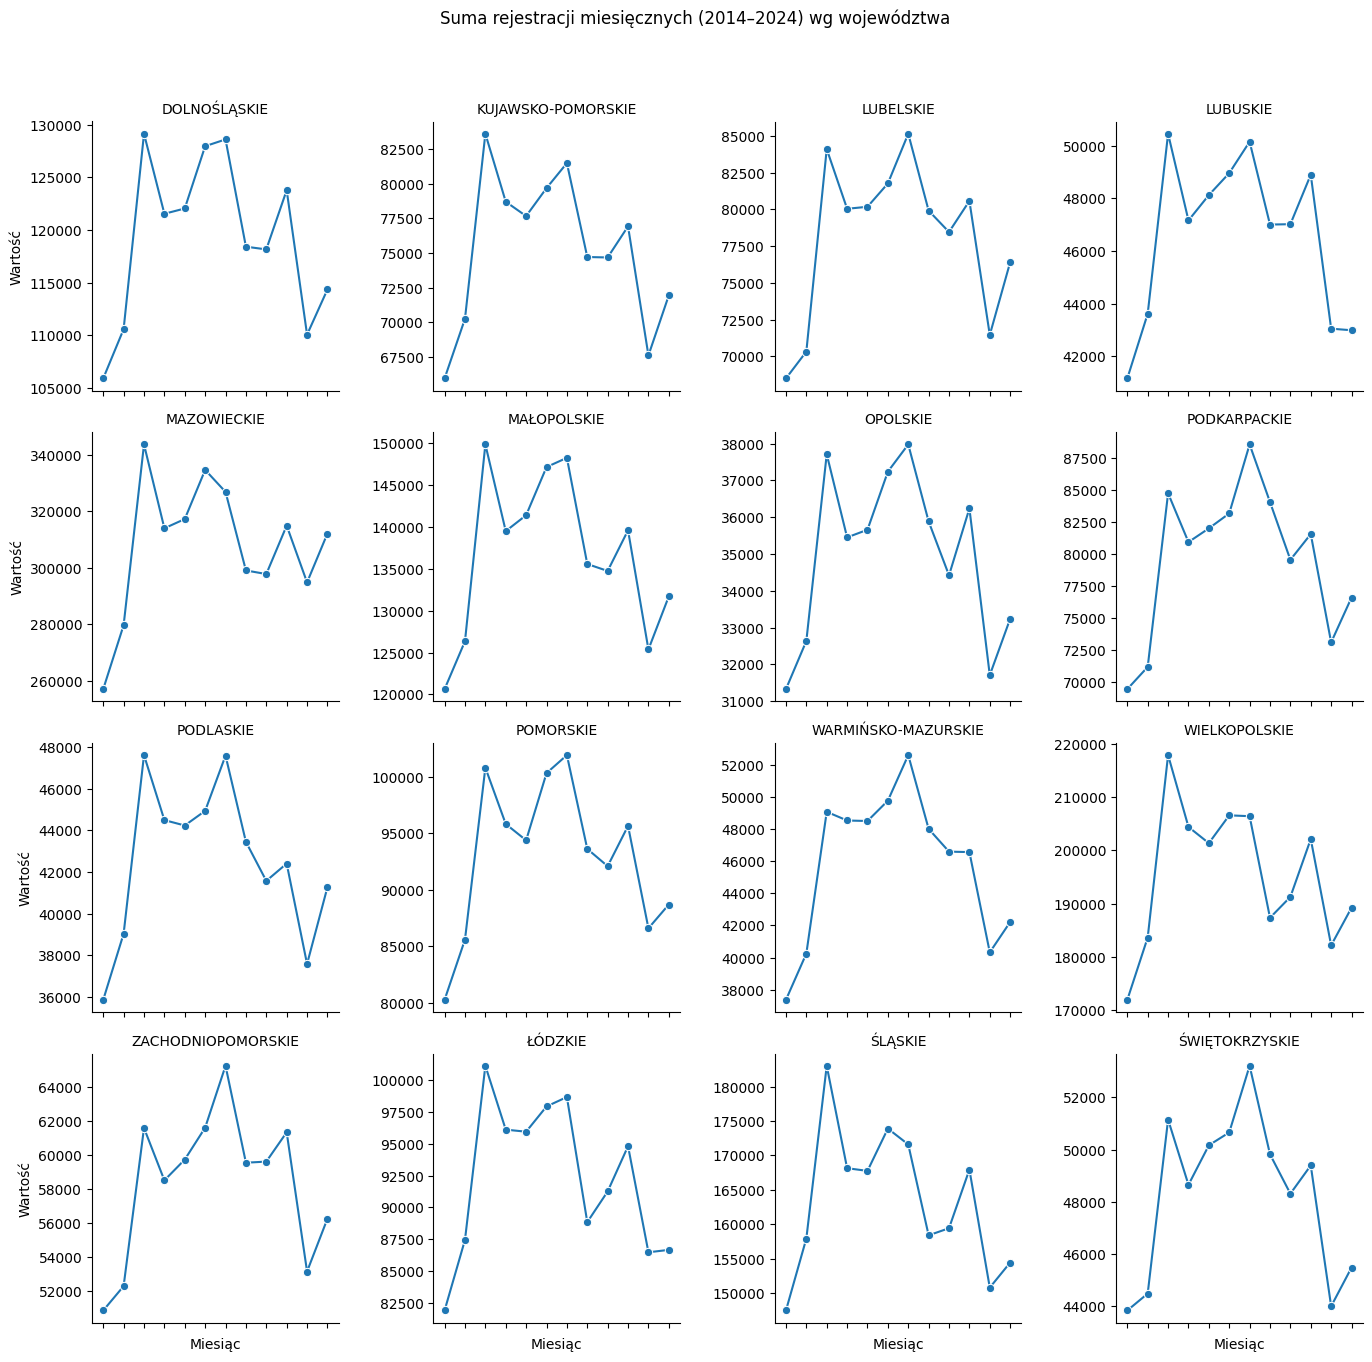

In [254]:
import seaborn as sns

# Przygotowanie danych – suma miesięczna w czasie (2016–2023)
df_all['Miesiąc'] = pd.Categorical(df_all['Miesiąc'], categories=miesiace, ordered=True)
df_grouped = df_all.groupby(['WOJEWÓDZTWO', 'Miesiąc'])['Wartość'].sum().reset_index()

# FacetGrid – jeden wykres na województwo
g = sns.FacetGrid(df_grouped, col="WOJEWÓDZTWO", col_wrap=4, height=3.5, sharey=False)
g.map(sns.lineplot, 'Miesiąc', 'Wartość', marker='o')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Suma rejestracji miesięcznych (2014–2024) wg województwa')
plt.show()


<ipython-input-15-3730696846>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suma_roczna.index, y=suma_roczna.values, palette='viridis')


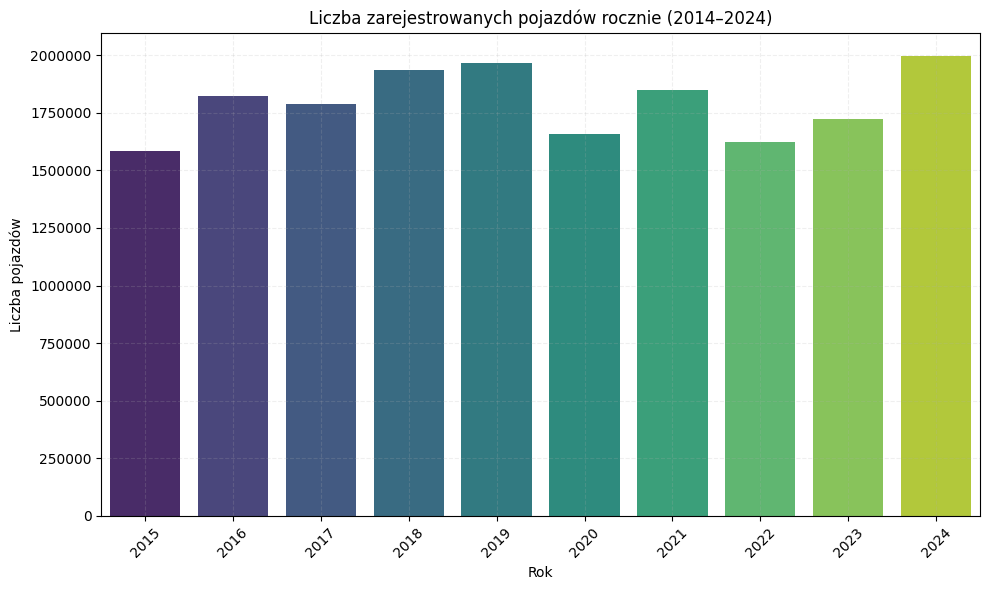

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10, 6))
suma_roczna = df_all.groupby('Rok')['Wartość'].sum()

sns.barplot(x=suma_roczna.index, y=suma_roczna.values, palette='viridis')

plt.title("Liczba zarejestrowanych pojazdów rocznie (2014–2024)")
plt.ylabel("Liczba pojazdów")
plt.xlabel("Rok")
plt.xticks(rotation=45)

# Ustaw formatowanie osi Y na pełne liczby
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

